## K Nearest Neighbors
### Python Implementation of the K Nearest Neighbors Algorithm from scratch
The [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a **supervised** machine learning algorithm that can be used for both classification and regression problems. Given a set of training examples, the model tries to predict the output or label of a new set of data by comparing its **similarity** to the training examples.

The KNN model is an **instance based** algorithm that stores all of the training examples in memory and compares how similar the new dataset is to all of the training examples before returning the target label of the most similar training example(s). It measures the similarity through a distance algorithm such as the [**Euclidean distance**](https://en.wikipedia.org/wiki/Euclidean_distance).


The KNN algorithm can be configured through the **n_neighbors** parameter, by which it chooses the number of neighbors it uses to make predictions. It returns the average value of the n neighbors it is mostly similar too,  in the case of a regression problem or for a classification problem, it returns the label that has the highest vote among the n neighbors. 

### Notation and Definitions:  
- $y:   $    target value or class. 
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\boldsymbol{k}:$Parameter that determines the numbers of neighbors to use for the algorithm
- $y^{(hat)}:  $ is our predicted value or class
- $\boldsymbol{D} = \{{\boldsymbol{(x^{(1)}},y^{(1)})},...,\boldsymbol{(x^{(n)}},y^{(n)})\} $: is the set of n training examples, where:
    - $\boldsymbol{(x^{(i)}}) $ is the $d$ dimensional input vector ;being the feature vector consisting of$ (x_1,x_2, ...x_d)$ of the training example $\boldsymbol{i}$ 
    - $y^{(i)}$ is the desired target value or class for that input vector
- $(\boldsymbol{x^{(i)}},y^{(i)})$:an instance of a training example.


### Regression Problem:
- Given a set of training examples **(x<sub>n</sub> , y<sub>n</sub>)**, and a new input dataset **x_new**, the model predicts the value of **x_new** by first computing the Euclidean distances between **x_new** and every other **x** in the training examples and returns the average score of the k nearest neighbors with the shortest distance from **x_new**.  
- A weighted version of the KNN algorithm also exists where it computes the weighted average of its nearest neighbors, with examples near x_new given a higher weight than the rest of it ks neighbors. A common approach is to give each neighbor a weight of 1/d, where d is the distance to the **x_new**.

### Classification Problem:
- The classification problem is similar to the regression problem , excepts it returns the label with the majority of votes among the  neighbors.

**Note** :  
 1. Since the algorithm relies on distance for classification, numeric features with different scales may require the training examples to be normalized for accuracy to improve.  
 2. KNN algorithm is also computationally and storage inefficent for large datasets since it keeps the training examples in memory.  
 3. KNN is particularly robust against outliers and serves as a good baseline for comparing the performance of other models.  
<br><br>
<figure style="margin-left:auto;margin-right:auto;text-align:center">
    <img src= "images/instance_based_learning.png" width="500" style=" margin-left=auto;margin-right=auto;display=block;"/> <br>
       <cite style='text-align:center'>Hands-on Machine Learning with Scikit-Learn, Keras, andTensorFlow</cite><br>
    </figure>

Below we implement the K Nearest Neighbors in Python from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

np.random.seed(150)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

### Datasets

In [2]:
## We are going to use the popular iris datasets consisting of 150 training examples and four features
## the goal of this algorithm is to classify the four(4) species of the iris flower given a set of input features

iris = load_iris()
X,y=iris.data,iris.target

print(f"X shape : {X.shape}") # We have 150 training examples consisting of 4 input features each
print(f"The features of the datasets: {iris.feature_names}")
print(f"The species of the iris datasets to classify :{iris.target_names}")

X shape : (150, 4)
The features of the datasets: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The species of the iris datasets to classify :['setosa' 'versicolor' 'virginica']


In [3]:
## We split the data in order to be able to test the accuracy of our model
## Instance based algorithms such has KNN achieve an almost 100% accuracy on the training data therefore a test 
# set is set aside in order to access the accuracy of our model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:{X_test.shape}")

X_train shape: (105, 4)
X_test shape:(45, 4)


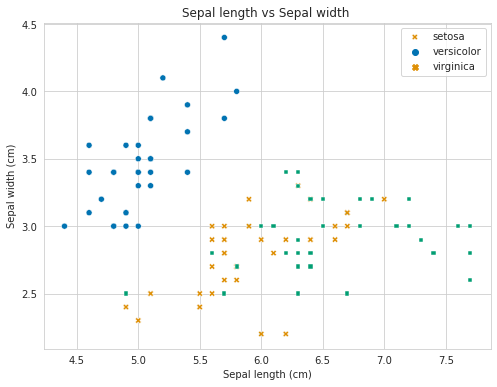

In [4]:
fig,ax=plt.subplots(figsize=(8,6))

## plotting the Sepal length against Sepal width of each examples
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train,palette='colorblind')

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal length vs Sepal width ")
plt.legend(iris.target_names)

## K Nearest Neighbors

In [6]:
class KNeighbors:
    def __init__(self,n_neighbors = 1):
        self.n_neighbors = n_neighbors ## set the number of k neighbors needed to make a prediction
        
    def fit(self,X,y): 
        # fit does no computation except to serve the value of X and y in memory
        self.data  = X
        self.target = y
    
    def predict(self,X):
        dist = self._euclidean_distance(X)
        indices = np.argsort(dist)[:,:self.n_neighbors]
        pred = np.max(self.target[indices],axis = 1)
        return pred
    
    def _euclidean_distance(self,X):
        # Calculate the euclidean distance between the set of new data points and the training examples
        k = X.shape[0]
        distances = np.array([np.sqrt(np.sum((X[i]-self.data)**2, axis= 1)) for i in range(k)])
        return distances
    
    def __repr__(self):
        return f"KNeighbors(n_neighbors={self.n_neighbors})"


## Training our model 

In [7]:
## Instantializing our knn neighbors with n_neighbors set to 1
knn=KNeighbors(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_train= knn.predict(X_train)

##calculating the accuracy of our model on the training set with n_neighbors =  1
acc_train=np.sum(y_pred_train==y_train)/len(y_train)

print("with n_neighbors = 1,")
print(f"accuracy on the training set: {acc_train}")

with n_neighbors = 1,
accuracy on the training set: 0.9619047619047619


## Testing our model

In [8]:
## calling predict on the test set
y_pred_test=knn.predict(X_test)

## calculating the accuracy our model 
acc_test=np.sum(y_pred_test==y_test)/len(y_test)
print("with n_neighbors = 1,")
print(f"accuracy on the testing set: {acc_test:.3f}")

with n_neighbors = 1,
accuracy on the testing set: 0.956


## Training and testing our model with different amount of neighbors

Text(0.5, 1.0, 'Accuracy vs Number of Neighbors')

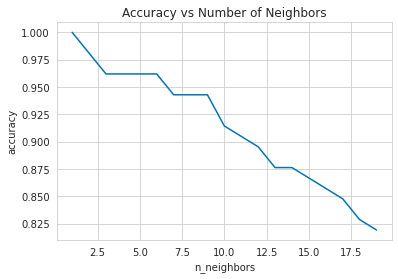

In [9]:
n_neighbors=np.arange(1,20)

accs=[]
for n in n_neighbors:
    knn= KNeighbors(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_train)
    ac=np.sum(y_pred==y_train)/len(y_train)
    accs.append(ac)

## We plot a graph of accuracy against the number of neighbors
plt.plot(n_neighbors,accs) 
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.title("Accuracy vs Number of Neighbors")

From the graph above, we see that the accuracy of our model decreases as the number of n_neighbors increases leading to overfitting of data